# Bloch Simulations

These are based on the paper

@misc{Lauzon2020,
  doi = {10.48550/ARXIV.2009.02789},
  url = {https://doi.org/10.48550/arxiv.2009.02789},
  author = {Lauzon, ML},
  keywords = {Medical Physics (physics.med-ph), FOS: Physical sciences, FOS: Physical sciences},
  title = {A Beginner's Guide to Bloch Equation Simulations of Magnetic Resonance Imaging Sequences},  
  year = {2020}}

In [58]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [39]:
def nth_momment(G, n, DeltaT=1):
    N = G.size
    k = np.arange(1, N + 1)
    full_moment = G * (k ** (n + 1) - (k - 1) ** (n + 1)) / (n + 1) * DeltaT ** (n + 1)
    cumulative_moment = np.cumsum(full_moment)
    return cumulative_moment

## Flow Compensation

* Regime 1

In [110]:
t = np.linspace(0, 1, 10000, endpoint=False)
dt = t[1] - t[0]

In [162]:
dt

0.0001

In [107]:
tripolar = sig.square(2 * np.pi * t * 1.5)
tripolar[tripolar < 0] = -2

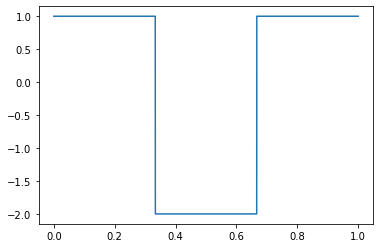

In [108]:
plt.plot(t, tripolar)

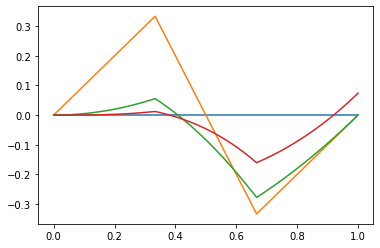

In [118]:
plt.plot([t[0], t[-1]], [0, 0])
plt.plot(t, nth_momment(tripolar, 0, dt))
plt.plot(t, nth_momment(tripolar, 1, dt))
plt.plot(t, nth_momment(tripolar, 2, dt))

In [120]:
# Calculate various gradient moments
m0_x = nth_momment(tripolar, 0, dt)
m1_x = nth_momment(tripolar, 1, dt)
# Set voxel conditions and initial Mxy
x0 = 0.02 # [cm]
vx = 7.5 # [cm/s]
Mxy_0 = np.exp(1j * np.pi/2)
# Calculate Mxy at all time points of sequence 
GAMMA = 2 * np.pi * 4257.59 # [rad/s/G]
phi = GAMMA * (x0 * m0_x + vx * m1_x)
Mxy = Mxy_0 * np.exp(-1j * phi)
# Calculate phase accrual wrt Mxy_0
phs = np.angle(Mxy / Mxy_0)

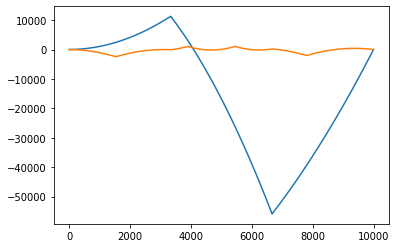

In [131]:
plt.plot(phi)
plt.plot(np.unwrap(phs + np.pi/2))

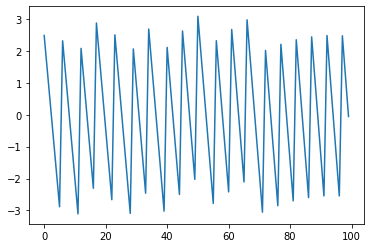

In [126]:
plt.plot(phs[-100:])

In [146]:
# Calculate various moments up to time TE (idx_TE) 
# Set voxel conditions and initial Mxy
# x0 in [cm], vx in [cm/s]
v = np.linspace(-50, 50, 100)
x = np.linspace(-10, 10, 200)
vx, x0 = np.meshgrid(v, x)
Mxy_0 = np.exp(1j * np.pi/2)
# Calculate Mxy at all (x0,vx) at time TE 
# phi = GAMMA * (x0[np.newaxis] * m0_x[:, np.newaxis, np.newaxis] + vx[np.newaxis] * m1_x[:, np.newaxis, np.newaxis])
phi = GAMMA * (x0 * m0_x[-1] + vx * m1_x[-1])
Mxy = Mxy_0 * np.exp(-1j * phi)
# Calculate phase change wrt Mxy_0
phs = np.angle(Mxy / Mxy_0)

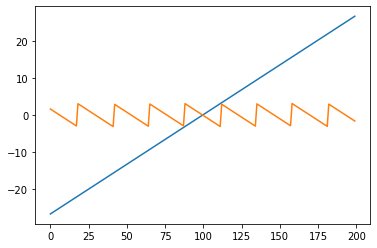

In [168]:
plt.plot(phi[:, 10])
plt.plot(phs[:, 10])

In [161]:
m0_x[-1]

9.999999996735573e-05